# TC 5033
## Deep Learning
## Fully Connected Deep Neural Networks
### Luis Miguel Álvarez Caloca A01732666

#### Activity 1b: Implementing a Fully Connected Network for Kaggle ASL Dataset

- Objective

The aim of this part of the activity is to apply your understanding of Fully Connected Networks by implementing a multilayer network for the [Kaggle ASL (American Sign Language) dataset](https://www.kaggle.com/datasets/grassknoted/asl-alphabet). While you have been provided with a complete solution for a Fully Connected Network using Numpy for the MNIST dataset, you are encouraged to try to come up with the solution.

- Instructions

    This activity requires submission in teams of 3 or 4 members. Submissions from smaller or larger teams will not be accepted unless prior approval has been granted (only due to exceptional circumstances). While teamwork is encouraged, each member is expected to contribute individually to the assignment. The final submission should feature the best arguments and solutions from each team member. Only one person per team needs to submit the completed work, but it is imperative that the names of all team members are listed in a Markdown cell at the very beginning of the notebook (either the first or second cell). Failure to include all team member names will result in the grade being awarded solely to the individual who submitted the assignment, with zero points given to other team members (no exceptions will be made to this rule).

    Load and Preprocess Data: You are provided a starter code to load the data. Be sure to understand the code.

    Review MNIST Notebook (Optional): Before diving into this activity, you have the option to revisit the MNIST example to refresh your understanding of how to build a Fully Connected Network using Numpy.

    Start Fresh: Although you can refer to the MNIST solution at any point, try to implement the network for the ASL dataset on your own. This will reinforce your learning and understanding of the architecture and mathematics involved.

    Implement Forward and Backward Pass: Write the code to perform the forward and backward passes, keeping in mind the specific challenges and characteristics of the ASL dataset.
    
     Design the Network: Create the architecture of the Fully Connected Network tailored for the ASL dataset. Choose the number of hidden layers, neurons, and hyperparameters judiciously.

    Train the Model: Execute the training loop, ensuring to track performance metrics such as loss and accuracy.

    Analyze and Document: Use Markdown cells to document in detail the choices you made in terms of architecture and hyperparameters, you may use figures, equations, etc to aid in your explanations. Include any metrics that help justify these choices and discuss the model's performance.  

- Evaluation Criteria

    - Code Readability and Comments
    - Appropriateness of chosen architecture and hyperparameters for the ASL dataset
    - Performance of the model on the ASL dataset (at least 70% acc)
    - Quality of Markdown documentation

- Submission

Submit this Jupyter Notebook in canvas with your complete solution, ensuring your code is well-commented and includes Markdown cells that explain your design choices, results, and any challenges you encountered.


In [4]:
import numpy as np
import string
import pandas as pd
import matplotlib.pyplot as plt
import cv2 as cv
import os
from sklearn.model_selection import train_test_split # Team's choice for data splitting

%load_ext autoreload
%autoreload 2
#################################
%matplotlib inline


#### We decided importing train_test_split from Scikit-learn, a widely used library in machine learning.
#### This function is reliable, well-tested, and considered a standard for dataset splitting.
#### It simplifies the process of creating reproducible and well-balanced splits.


In [37]:
# to load the data using google colaboratory
# DATA_PATH = '/media/pepe/DataUbuntu/Databases/asl_data/'
#DATA_PATH = '/home/pepe/Documents/github_repos/datasets/asl_data'
from google.colab import drive
drive.mount('/content/drive')
DATA_PATH = '/content/drive/My Drive/MAESTRÍA/TRIMESTRE 3/DEEP LEARNING/HW1/asl_data'

train_df = pd.read_csv(os.path.join(DATA_PATH, 'sign_mnist_train.csv'))
valid_df = pd.read_csv(os.path.join(DATA_PATH, 'sign_mnist_valid.csv'))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
# to load the data in a local environment
DATA_PATH = '../data/asl_data'
train_df = pd.read_csv(os.path.join(DATA_PATH, 'sign_mnist_train.csv'))
valid_df = pd.read_csv(os.path.join(DATA_PATH, 'sign_mnist_valid.csv'))

In [6]:
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,12,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


### Importar Images

In [7]:
y_train = np.array(train_df['label'])
y_val = np.array(valid_df['label'])
del train_df['label']
del valid_df['label']
x_train = train_df.values.astype(np.float32)
x_val = valid_df.values.astype(np.float32)

In [8]:
def split_val_test(x: np.ndarray, y: np.ndarray, pct: float = 0.5, shuffle: bool = True) -> tuple:
    '''
    Split the previously loaded validation set into valition and test.

    Args:
      x (np.ndarray): The features of the dataset (input data, images or tabular data).
      y (np.ndarray): The labels corresponding to the features (target values).
      pct (float): The proportion of the dataset to allocate to the test set (default is 0.5 or 50%).
      shuffle (bool): Whether to shuffle the dataset before splitting (default is True).
        Setting shuffle = True ensures that the data is randomly mixed before splitting.
        This prevents potential biases caused by ordered datasets (e.g., samples grouped by class).
        It helps create representative validation and test sets, improving model evaluation and generalization.
        Shuffle is a standard practice in most machine learning workflows unless the data is sequential (e.g., time series).
    
    Returns:
      tuple: The split datasets in the following order: x_val, y_val, x_test, y_test
    '''
    x_val, x_test, y_val, y_test = train_test_split(
        x, y, test_size=pct, shuffle=shuffle, random_state=42 # random_state=42 Ensures reproducibility by setting a fixed random seed for shuffling.
    )
    return x_val, y_val, x_test, y_test


In [ ]:
#NOTE: version proposed by juan (more manual)
def split_val_test(x, y, pct=0.5, shuffle=True):
    '''
    Split the previously loaded validation set into valition and test.

    Args:
      x (np.ndarray): The features of the dataset (input data, images or tabular data).
      y (np.ndarray): The labels corresponding to the features (target values).
      pct (float): The proportion of the dataset to allocate to the test set (default is 0.5 or 50%).
      shuffle (bool): Whether to shuffle the dataset before splitting (default is True).
        Setting shuffle = True ensures that the data is randomly mixed before splitting.
        This prevents potential biases caused by ordered datasets (e.g., samples grouped by class).
        It helps create representative validation and test sets, improving model evaluation and generalization.
        Shuffle is a standard practice in most machine learning workflows unless the data is sequential (e.g., time series).
    
    Returns:
      tuple: The split datasets in the following order: x_val, y_val, x_test, y_test
    '''
    if shuffle:
        idx = np.random.permutation(len(y))
        x = x[idx]
        y = y[idx]
    split = int(len(y) * pct)
    return x[:split], y[:split], x[split:], y[split:]

In [9]:
x_val, y_val, x_test, y_test = split_val_test(x_val, y_val)

In [ ]:
### The following
alphabet=list(string.ascii_lowercase)
alphabet.remove('j')
alphabet.remove('z')
print(len(alphabet))

24


### Normalise

In [ ]:
def normalise(x_mean: float, x_std: float, x_data: np.ndarray) -> np.ndarray:
    '''
    Normalise the input data based on the mean and standard deviation.

    Args:
        x_mean (float): Mean of the input data.
        x_std (float): Standard deviation of the input data.
        x_data (np.ndarray): Input data.

    Returns:
        np.ndarray: Normalised input data.
    '''
    return (x_data - x_mean) / x_std

x_mean = x_train.mean() # We calculate the mean of the training set
x_std = x_train.std() # We calculate the standard deviation of the training set

   # - We only use the training set to compute these statistics to avoid data leakage.
   # - The validation and test sets must not influence the model during training.


x_train = normalise(x_mean, x_std, x_train) # Normalizing the training set
x_val = normalise(x_mean, x_std, x_val) # Normalizing the validation set using training stats
x_test = normalise(x_mean, x_std, x_test) # Normalise the test set using training stats

x_train.mean(), x_train.std()

(3.6268384e-06, 0.99999946)

#### Mean expected value of ~0 and standard deviation of ~1
#### Which in this case is correct, normalization was applied correctly.

### Graficar muestras

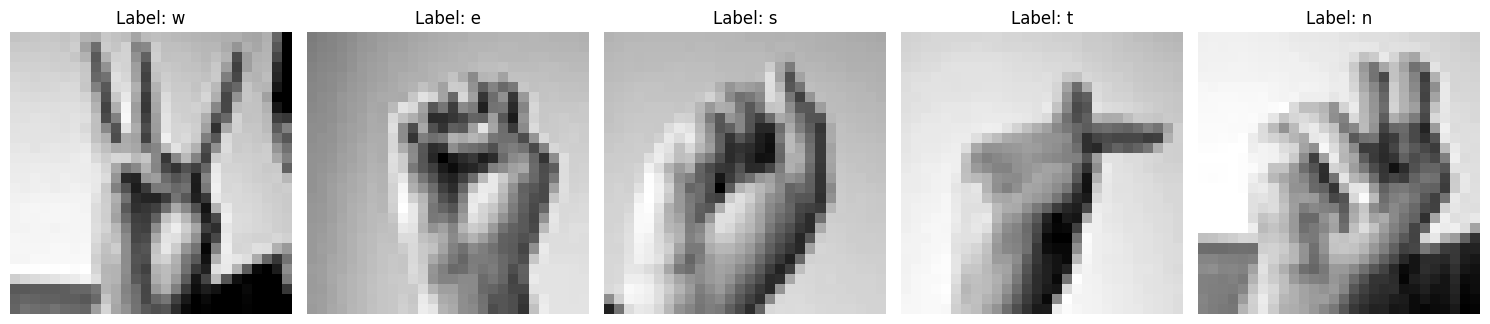

In [ ]:
def plot_samples(x_data: np.array, y_data: np.array, num_samples: int = 5):
    """
    Plot a random sample of images from the dataset.

    Args:
        x_data (numpy.ndarray): Images set to plot.
        y_data (numpy.ndarray): Labels of the images.
        num_samples (int): Number of samples to plot.

    Returns:
        None
    """
    # Select random indices to plot
    indices = np.random.choice(range(len(x_data)), num_samples, replace=False)
    selected_images = x_data[indices]
    selected_labels = y_data[indices]

    # Create the figure using matplotlib
    fig, axes = plt.subplots(1, num_samples, figsize=(15, 5))
    for i, ax in enumerate(axes):
        # Reshape the image to 28x28
        image = selected_images[i].reshape(28, 28)
        label = selected_labels[i]

        # Show the image and set the title
        ax.imshow(image, cmap='gray')
        ax.set_title(f"Label: {alphabet[label]}")
        ax.axis('off')  # Hide axes

    plt.tight_layout()
    plt.show()

plot_samples(x_train, y_train, num_samples=5)

### Ecuaciones para nuestro modelo


$$z^1 = W^1 X + b^1$$

$$a^1 = ReLU(z^1) $$

$$z^2 = W^2 a^1 + b^2$$

$$\hat{y} = \frac{e^{z^{2_k}}}{\sum_j{e^{z_j}}}$$


$$ \mathcal{L}(\hat{y}^{i}, y^{i}) =  - y^{i}  \ln(\hat{y}^{i}) = -\ln(\hat{y}^i)$$


$$ \mathcal{J}(w, b) =  \frac{1}{num\_samples} \sum_{i=1}^{num\_samples}-\ln(\hat{y}^{i})$$

### Funciones adicionales

#### Mini batches

In [24]:
def create_minibatches(mb_size: int, x: np.ndarray, y: np.ndarray, shuffle: bool = True):
    '''
    Function to create minibatches of the data for more efficient training.
    This function is used to create subsets of the data to be used during training.
    Args:
        mb_size (int): Size of the minibatches.
        x (np.ndarray): Input data.
        y (np.ndarray): Labels.
        shuffle (bool): Whether to shuffle the data before creating minibatches.
    Returns:
        generator: A generator that yields minibatches of the data.
    '''
    # Ensure the number of samples in x and y are the same
    assert x.shape[0] == y.shape[0], 'Error en cantidad de muestras'
    total_data = x.shape[0] # Get the total number of data samples
    if shuffle: # Shuffle the data if shuffle is True
        idxs = np.arange(total_data) # Create an array of indices and shuffle them
        np.random.shuffle(idxs)
        # Reorder x and y according to the shuffled indices
        x = x[idxs]
        y = y[idxs]  
    # Generate minibatches
    return ((x[i:i+mb_size], y[i:i+mb_size]) for i in range(0, total_data, mb_size))

## Nuestra clase Linear, ReLU y Sequential

###  Clase Linear

### Clase ReLU

### Clase Sequential

### Cost Function

### Loop de entrenamiento

### Create your model and train it

### Test your model on Random data from your test set

In [ ]:
idx = np.random.randint(len(y_test))
plot_number(x_test[idx].reshape(28,28))
pred = model.predict(x_test[idx].reshape(-1, 1))
print(f'el valor predicho es: {alphabet[pred]} el valor real es:{alphabet[y_test[idx]]}')